In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt


x = sp.Symbol("x")

## Tema 6
- Integración exacta
- Integración numérica
    - Punto medio
    - Trapezoide compuesto (numpy)
    - Scipy
- Áreas y volúmenes


In [ ]:
f = sp.exp(x)

primitiva = sp.integrate(f,x)       # Integral

I_exacta = sp.integrate(f,(x,0,2))  # Definida a intervalos

display(I_exacta.evalf())                   # Evaluar la función

# Definimos parámetro
t = sp.Symbol('t', real=True) 

I_parametro = sp.integrate(f,(x,0,t))

display(I_parametro)

#### Integración numérica

In [ ]:
def f(x):
    return sp.sin(x)

def punto_medio(f , a , b):
    return (b - a) * f((a + b)/2)

In [ ]:
I_exacta = sp.integrate(sp.sin(x),(x , 0 , 2*sp.pi))

display("Exacta:", I_exacta)

I_aprox = punto_medio(f , 0 , 2*sp.pi)

display("Aproximación (punto medio):", I_aprox)

nodos = np.linspace(0, 2*np.pi, 1000)
print('Aproximación por trapecio compuesto:\n',np.trapezoid(np.sin(nodos), nodos)) 

In [ ]:
import scipy.integrate as integrate  

x1 = np.linspace(0,2*np.pi,1001)
y1 = np.sin(x1)    # Expresión

aproxsimp = integrate.simpson(y1,x1)   # Aproximación por la fórmula de Simpson compuesta
print("Simpson compuesto:\n",aproxsimp)

#### Áreas y volúmenes

$$
A=\int_a^b|f(x)|\,dx\,.
$$
$$
A=\int_a^b|f(x)-g(x)|\,dx\,.
$$
$$
V=\pi\int_a^b[f(x)]^2\,dx\,.
$$

In [ ]:
f = x**3
g = x  

area2 = sp.integrate(sp.Abs(f-g),(x, -1 , 1))  # Área entre f y g

area = sp.integrate(sp.Abs(f), (x , -1 , 1))   # Área entre f y el eje x

display(area2)
display(area)

#### Representar gráficamente

In [ ]:
import matplotlib.pyplot as plt

# Definir las funciones
def f(x):
    return x**3

def g(x):
    return x

# Definir el intervalo
a = -1
b = 1

# Crear un arreglo de valores x en el intervalo [a, b]
x = np.linspace(a, b, 400)

# Calcular los valores de las funciones en esos puntos x
y_f = f(x)
y_g = g(x)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y_f, label='f(x) = x^3')
plt.plot(x, y_g, label='g(x) = x')

# Rellenar el área entre las dos funciones
plt.fill_between(x, y_f, y_g, label='Área limitada')

# Añadir etiquetas y leyenda
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Área limitada por dos funciones')
plt.legend()

# Mostrar la gráfica
plt.show()

#### Volumen
Calcula el volumen del sólido de revolucion obtenido cuando hacemos girar alrededor del eje OX la gráfica de $f$ en el intervalo $[1,4]$.

In [ ]:
g = sp.sqrt(x)  
vol = sp.pi * sp.integrate(g*g,(x,1,4))
print(vol.evalf())

Volumen entre dos gráficas

In [ ]:
x = sp.Symbol("x")
f = x**3
g = x  
vol = sp.pi * sp.integrate(g*g - f*f,(x,-1,1))
print(vol.evalf())

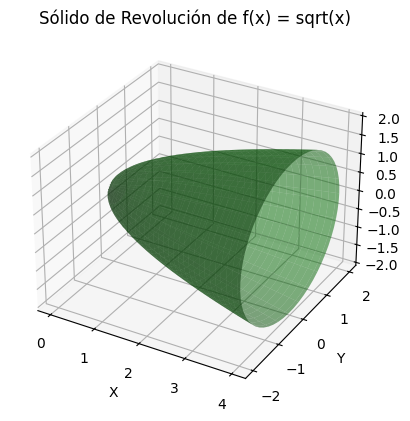

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

u = np.linspace(0, 4, 60) 
v = np.linspace(0, 2*np.pi, 60)
U, V = np.meshgrid(u, v)

# Definición de la función: f(x) = sqrt(x)
f = np.sqrt(U)

X = U
# 2. Aplicar la función f a las coordenadas cilíndricas
Y = f * np.cos(V)
Z = f * np.sin(V)


# Configuración del gráfico (opcional)
ax.set_title('Sólido de Revolución de f(x) = sqrt(x)')
ax.set_xlabel('X ')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot_surface(X, Y, Z, alpha=0.5, color='green')

plt.show()

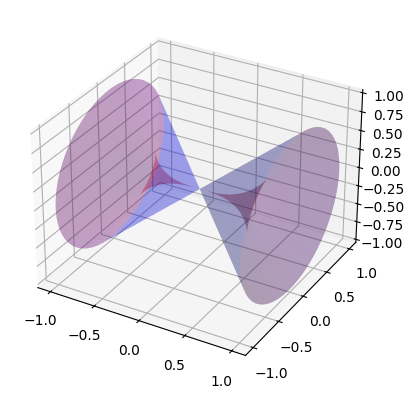

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

u = np.linspace(-1, 1, 60)
v = np.linspace(0, 2*np.pi, 60)
U, V = np.meshgrid(u, v)

X = U
g = U**3

# Representación de x³
Y1 = g * np.cos(V)
Z1 = g * np.sin(V)

# Representación de recta x 
Y2 =  U * np.cos(V)
Z2 =  U * np.sin(V)

ax.plot_surface(X, Y1, Z1, alpha=0.2, color='red')
ax.plot_surface(X, Y2, Z2, alpha=0.2, color='blue')
plt.show()

## Tema 7
- Representación de funciones con 2 variables
    - Mapa de colores
    - Curva de nivel
- Representación con Sympy
- Superficies de nivel
- Límites en varias variables 

#### Mapa de colores

In [ ]:
N = 50  # Consideramos 50 puntos en cada dirección de los ejes
x = np.linspace(-np.pi, np.pi, N)
y = np.linspace(-np.pi, np.pi, N)

X, Y = np.meshgrid(x,y)

f = np.sin(X)*np.cos((X*Y**2)/10)

Locator attempting to generate 2001 ticks ([-1.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).


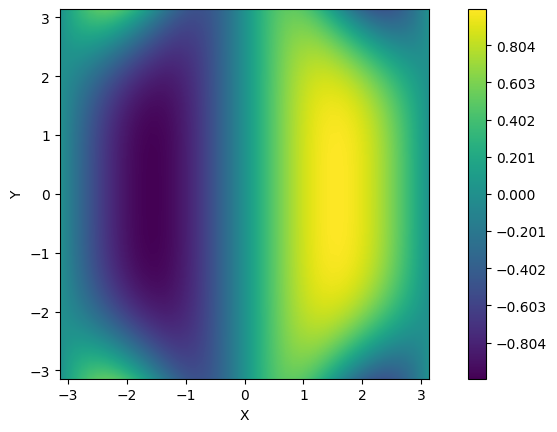

In [3]:
plt.contourf(X,Y,f,2000)
# Añadimos la barra de colores con los valores de la función
plt.colorbar()  

# Etiquetamos los ejes
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('square')
plt.show()

#### Curva de nivel

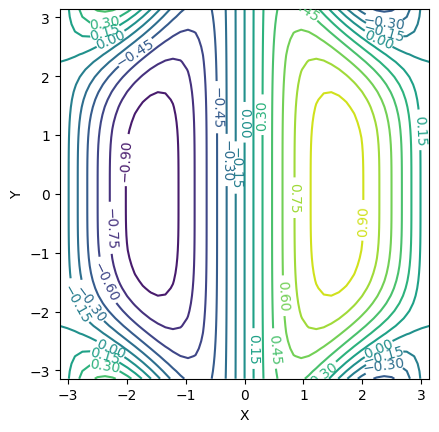

In [6]:
p = plt.contour(X,Y,f,16) # 16 : número de lineas


plt.clabel(p) # Añadimos el valor numérico a cada curva de nivel

# Etiquetamos los ejes
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('square')
plt.show()

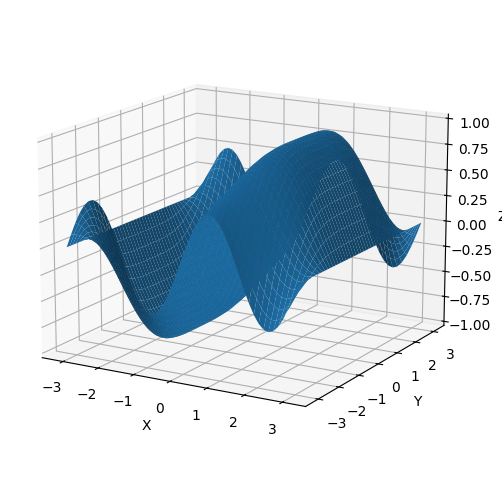

In [ ]:
from mpl_toolkits.mplot3d import axes3d
# Creación de la figura 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Representación de la superficie z = f(x,y)
surf = ax.plot_surface(X,Y,f)  

# Etiquetamos los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Punto de vista del observador: elevación
ax.view_init(elev=15)
plt.show()